<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Sample problem of predicting home price in monroe, new jersey (USA)

Below is the table containing home prices in monroe twp, NJ. Here price depends on **area (square feet), bed rooms and age of the home (in years)**. Given these prices we have to predict prices of new homes based on area, bed rooms and age.

<img src="Data/homeprices.jpg" style='height:200px;width:350px'>

Given these home prices find out price of a home that has,

**3000 sqr ft area, 3 bedrooms, 40 year old**

**2500 sqr ft area, 4 bedrooms,  5 year old**

We will use regression with multiple variables here. Price can be calculated using following equation,

<img src="Data/equation.jpg" >

Here area, bedrooms, age are called independant variables or **features** whereas price is a dependant variable

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_csv('./Data/homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


**Data Preprocessing: Fill NA values with median value of a column**

In [ ]:
df.bedrooms.median()

4.0

In [ ]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [ ]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg.intercept_

221323.00186540408

**Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old**

In [ ]:
reg.predict([[3000, 3, 40]])

/home/ben/mambaforge/envs/cfast/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [ ]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

**Find price of home with 2500 sqr ft area, 4 bedrooms,  5 year old**

In [ ]:
reg.predict([[2500, 4, 5]])

/home/ben/mambaforge/envs/cfast/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

In [ ]:
#|eval: false
np.set_printoptions(precision=2, suppress=True)
corrcoef = np.corrcoef(df, rowvar=False)
corrcoef

array([[ 1.  ,  0.75, -0.45,  0.9 ],
       [ 0.75,  1.  , -0.88,  0.92],
       [-0.45, -0.88,  1.  , -0.73],
       [ 0.9 ,  0.92, -0.73,  1.  ]])

In [ ]:
#| eval: false
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
df.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

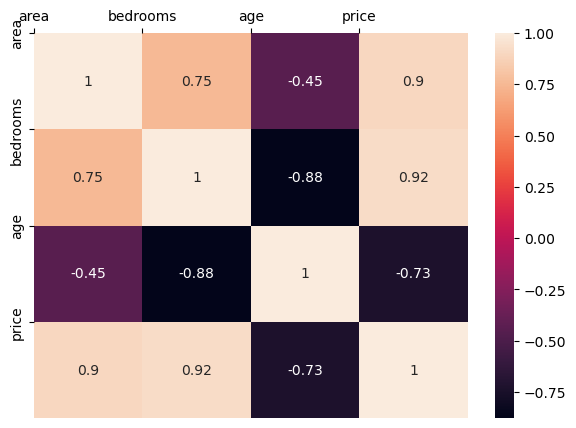

In [ ]:
#| eval: false
plt.figure(figsize=(7,5))
sn.heatmap(corrcoef, annot=True)

plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
# Move x-axis ticks and labels to the top
plt.gca().xaxis.set_ticks_position('top')


plt.show()

<h3>Exercise<h3>

In exercise folder (same level as this notebook on github) there is **hiring.csv**. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,


**2 yr experience, 9 test score, 6 interview score**

**12 yr experience, 10 test score, 10 interview score**

<h3>Answer<h3>

53713.86 and 93747.79